In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [30]:
cancer_data = load_breast_cancer()
x, y = cancer_data.data, cancer_data.target

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [33]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
y_pred_logistic = logistic_classifier.predict(x_test)
y_pred_rf=random_forest_classifier.predict(x_test)

In [35]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9649122807017544

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [36]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9649122807017544

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [37]:
print('\nLogistic Regression\n',confusion_matrix(y_test, y_pred_logistic))
print('\nRandom forest\n',confusion_matrix(y_test, y_pred_rf))


Logistic Regression
 [[40  3]
 [ 1 70]]

Random forest
 [[40  3]
 [ 1 70]]


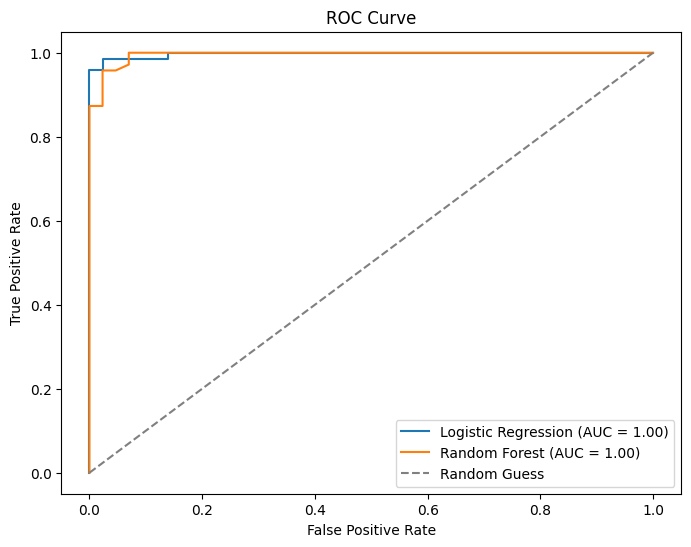

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_prob_logistic = logistic_classifier.predict_proba(x_test)[:, 1]
y_prob_rf = random_forest_classifier.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_logistic = roc_auc_score(y_test, y_prob_logistic)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
